In [571]:
import pandas as pd
import plotnine as pn

data_location= 'tweet_and_user_data.csv'

pd.options.display.max_columns = 500
tweet_data = pd.read_csv(data_location)


C:\Users\nuria\AppData\Local\Temp\ipykernel_21148\2821197400.py:7: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.


In [572]:
tweet_data.shape

(40581, 56)

In [573]:
tweet_data.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,id_user,name_user,username_user,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,1425590913959612419,1425590913959612419,1.628722e+12,2021-08-12 00:52:14,200,NaN,RT @girlsalliance: We're so proud of the four ...,en,[],[],409486555,409486555,MichelleObama,Michelle Obama,4,0,https://twitter.com/MichelleObama/status/14255...,[],[],0,NaN,True,0,0,232,0,NaN,NaN,NaN,NaN,1.047165e+18,We're so proud of the four organizations in ou...,1.425590e+18,[],2021-08-12 00:46:58 CEST,NaN,NaN,NaN,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...
1,1427736867739299841,1427736867739299841,1.629234e+12,2021-08-17 22:59:29,200,NaN,Some casual suggestions to 😏SLIDE😏 into when u...,en,"['shoesdaytuesday', 'afterskewlslide']",[],21447363,21447363,katyperry,KATY PERRY,2,22,https://twitter.com/katyperry/status/142773686...,[],['https://pbs.twimg.com/media/E9BXG4YVkAAl3_A....,1,https://pbs.twimg.com/media/E9BXG4YVkAAl3_A.jpg,False,5266,368,408,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
2,1427667300488937476,1427667300488937476,1.629217e+12,2021-08-17 18:23:03,200,NaN,RT @ValaAfshar: You are not your job.,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,18,https://twitter.com/katyperry/status/142766730...,[],[],0,NaN,True,0,0,764,0,NaN,NaN,NaN,NaN,2.597252e+08,You are not your job.,1.427648e+18,[],2021-08-17 17:05:53 CEST,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
3,1427667012105371652,1427667012105371652,1.629217e+12,2021-08-17 18:21:55,200,NaN,What have we become 😔😂 Toddler Cites Freedom ...,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,18,https://twitter.com/katyperry/status/142766701...,['https://www.theonion.com/toddler-cites-freed...,[],0,NaN,False,5638,476,438,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
4,1427497703596990467,1427497703596990467,1.629177e+12,2021-08-17 07:09:08,200,NaN,The tech giants that refuse to massively addre...,en,[],[],21447363,21447363,katyperry,KATY PERRY,2,7,https://twitter.com/katyperry/status/142749770...,[],[],0,NaN,False,8810,546,1211,https://twitter.com/VICENews/status/1427311204...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...


In [574]:
# Creamos un conjunto de datos con agregaciones a nivel de usuario. Hacemos esto para generar unos datos nuevos para analizar despues.

unique = ['id', 'conversation_id', 'retweet_id']
avg = ['nlikes', 'nreplies', 'nretweets']

gby = ['id_user', 'username_user', 'join_date', 'following', 'followers', 'likes', 'media', 'location', 'verified']

agg = {col : 'nunique' if col in unique else 'mean' for col in unique + avg}

tweet_data['location'] = tweet_data.location.fillna('')

user_stats = tweet_data.groupby(gby).agg(agg).reset_index()

user_stats.head()

,id_user,username_user,join_date,following,followers,likes,media,location,verified,id,conversation_id,retweet_id,nlikes,nreplies,nretweets
0,12,jack,2006-03-21,4406,5656510,35242,2836,,True,74,48,18,1699.081081,155.418919,574.175676
1,13,biz,2006-03-21,1596,2669130,7152,911,"San Francisco, CA",True,7,5,1,13.000000,1.714286,1.714286
2,428333,cnnbrk,2007-01-02,119,61197525,27,17019,Everywhere,True,66,65,1,1631.545455,417.424242,424.303030
3,717313,arstechnica,2007-01-28,1330,1147218,8425,6238,NYC - Boston - Chicago - SF,True,111,111,11,22.675676,1.702703,10.153153
4,742143,BBCWorld,2007-02-01,18,32526661,13,25403,"London, UK",True,441,436,65,734.868481,103.995465,296.519274


In [575]:
user_stats.shape, user_stats.id_user.nunique()
##tenemos cerca 850 cuentas y 15 features

((847, 15), 847)

## Clustering: Kmeans

In [577]:
#Para ejecutar los modelos hacemos primero los imports correspondientos
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#cogemos las variables a analizar
X_variables = ['followers', 'following', 'likes', 'media']

In [578]:
#declaramos el modelo, ponemos el numero de clusters y el random_state=0, ya que sino cada vez que ejecutamos el  modelo los resultados van a cambiar
model = KMeans(n_clusters=5, random_state=0)

#esto va a justar el modelo
model.fit(user_stats[X_variables])

#haremos el predict sobre los mismos datos
user_stats['predictions_kmeans'] = model.predict(user_stats[X_variables])

#para observar el resultado obtenido haremos un value_counts()
user_stats.predictions_kmeans.value_counts()

predictions_kmeans
0    556
4    187
3     60
2     36
1      8
Name: count, dtype: int64

In [579]:
#Declaramos un modelo, el 2 indica el numero de componentes principales que queremos y ek rabdin state
model = PCA(2, random_state=0)
model.fit(user_stats[X_variables]);

In [580]:
#PCA no predice, sino que transfoorma los datos
pd.DataFrame(model.transform(user_stats[X_variables]))

,0,1
0,-3.227589e+06,-7197.074771
1,-6.214967e+06,-8804.975255
2,5.231342e+07,-35098.140138
3,-7.736879e+06,-8411.997256
4,2.364256e+07,-23018.315158
...,...,...
842,-8.863191e+06,-8629.744132
843,-3.251987e+06,-11669.522991
844,4.301823e+06,-14867.544308
845,-5.690061e+06,-10636.000104


## Kmeans

In [582]:
#Kmeans es muy escalable u sigue el patrón tipico de un modelo de aprendizaje supervisado
#MiniBatchMeans es una adacpcion de kmeans para que sea mas rapido y escalable
from sklearn.cluster import KMeans, MiniBatchKMeans

In [583]:
#declaramos el modelo, ponemos el numero de clusters y el random_state=0, ya que sino cada vez que ejecutamos el  modelo los resultados van a cambiar
model_3 = KMeans(n_clusters=3, random_state=0)

#esto va a justar el modelo
model_3.fit(user_stats[X_variables])

#haremos el predict sobre los mismos datos
user_stats['predictions_kmeans_3'] = model_3.predict(user_stats[X_variables])

#para observar el resultado obtenido haremos un value_counts()
user_stats.predictions_kmeans_3.value_counts()

predictions_kmeans_3
0    785
2     52
1     10
Name: count, dtype: int64

In [584]:
#declaramos el modelo, ponemos el numero de clusters y el random_state=0, ya que sino cada vez que ejecutamos el  modelo los resultados van a cambiar
#como podemos ver podemos variar el numero de clusters
model_10 = KMeans(n_clusters=10, random_state=0)

#lso datos usados para el fit son todos datos numericos
model_10.fit(user_stats[X_variables])
#haremos el predict sobre los mismos datos
user_stats['predictions_kmeans_10'] = model_10.predict(user_stats[X_variables])

#para observar el resultado obtenido haremos un value_counts()
user_stats.predictions_kmeans_10.value_counts()

predictions_kmeans_10
0    318
4    167
8    134
9     97
3     70
7     22
2     21
6     11
5      4
1      3
Name: count, dtype: int64

In [585]:
#podemos ver como estan situados los clusters
#los valores que vemos van a ser un poco la "media" de estos grupos
pd.DataFrame(model_3.cluster_centers_, columns=X_variables)

,followers,following,likes,media
0,5.808735e+06,12550.436943,8038.670064,7278.182166
1,9.053069e+07,108345.400000,6907.000000,5171.600000
2,3.960890e+07,1833.730769,2241.576923,13800.423077


In [586]:
#podemos ver como estan situados los clusters
#los valores que vemos van a ser un poco la "media" de estos grupos
pd.DataFrame(model_10.cluster_centers_, columns=X_variables)

,followers,following,likes,media
0,3.598492e+06,7221.028213,7490.605016,5999.576803
1,1.175520e+08,292618.666667,4198.333333,2412.666667
2,4.366823e+07,1162.190476,3079.857143,16668.142857
3,1.724878e+07,1110.285714,8227.714286,8669.085714
4,6.554903e+06,2351.527273,9159.363636,6335.818182
5,8.475913e+07,50484.000000,12644.250000,3634.250000
6,6.155409e+07,637.090909,2786.000000,23606.272727
7,2.982477e+07,3037.954545,1173.500000,6122.090909
8,6.353575e+05,46655.066667,9480.903704,10994.592593
9,1.092985e+07,8094.804124,5721.814433,6867.721649


In [587]:
#podemos hacer una evaluacion basica, en este caso viendo cuantas evaluaxiones tuvo el algoritmo
#para converger este algoritmo necesita iterar varias veces
model_10.n_iter_

4

In [588]:
#La inertia busca la suma de las distintas distancias cuadradas de los diferentes centroides 
#cuanto mas grande es el numero comparado con los diferentes centroides mejor porque esta mas lejos
model_10.inertia_

2738586477872647.5

In [589]:
#em caso de querer que vaya mas rapido el entrenamiento podemos reducir el num max de iteracciones - pero subira la inertia ( la calidad del "fit")
model_10_max_iter = KMeans(n_clusters=10, max_iter=2, random_state=0)
model_10_max_iter.fit(user_stats[X_variables])

model_10_max_iter.n_iter_

2

In [590]:
#podemos comprobar que no ha cambiado mucho la inertia
model_10_max_iter.inertia_

2740447391047475.0

In [591]:
#Si tenemos mucha cantidad de datos podemos usar MiniBatchKmeans que es un algoritmo similar 
#que aprovecha de crear unos batches de los datos para hacerlo mas rapido
#tenemos que fiajr el batch_size en este caso
model = MiniBatchKMeans(n_clusters=10, batch_size=512, random_state=0)
#el entrenamiento y predict se hace dsiguiendo la misma estructura que antes
model.fit(user_stats[X_variables])
user_stats['predictions_kmeans_minibatch'] = model.predict(user_stats[X_variables])

user_stats.predictions_kmeans_minibatch.value_counts()

predictions_kmeans_minibatch
5    223
2    193
0    132
9    104
6     80
3     52
8     22
4     19
1     15
7      7
Name: count, dtype: int64

In [592]:
#podemos transformar los datos
#va a coger nuestros datos y va a poner exactamente cual es la distancia de cada punto a cada cluster
#lo que nos interesa es que este lo mas cerca posible de un cluster y lo mas lejano posible de los otros clusters
pd.DataFrame(model_3.transform(user_stats[X_variables]))

,0,1,2
0,1.549143e+05,8.487425e+07,3.395241e+07
1,3.139630e+06,8.786162e+07,3.693977e+07
2,5.538879e+07,2.933337e+07,2.158862e+07
3,4.661530e+06,8.938354e+07,3.846169e+07
4,2.671794e+07,5.800413e+07,7.082251e+06
...,...,...,...
842,5.787848e+06,9.050985e+07,3.958800e+07
843,1.773794e+05,8.489865e+07,3.397679e+07
844,7.377205e+06,7.734485e+07,2.642298e+07
845,2.614750e+06,8.733672e+07,3.641487e+07


## Visualización

In [594]:
#Visualizamos el resultado del algotimo de 3 clusters
#utilizamos las variables followers, following, media y numero de likes
#convertimos a string simplemente para que en el grafico salgan las categorias

user_stats['predictions_kmeans_3'] = user_stats.predictions_kmeans_3.astype(str)



C:\Users\nuria\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log


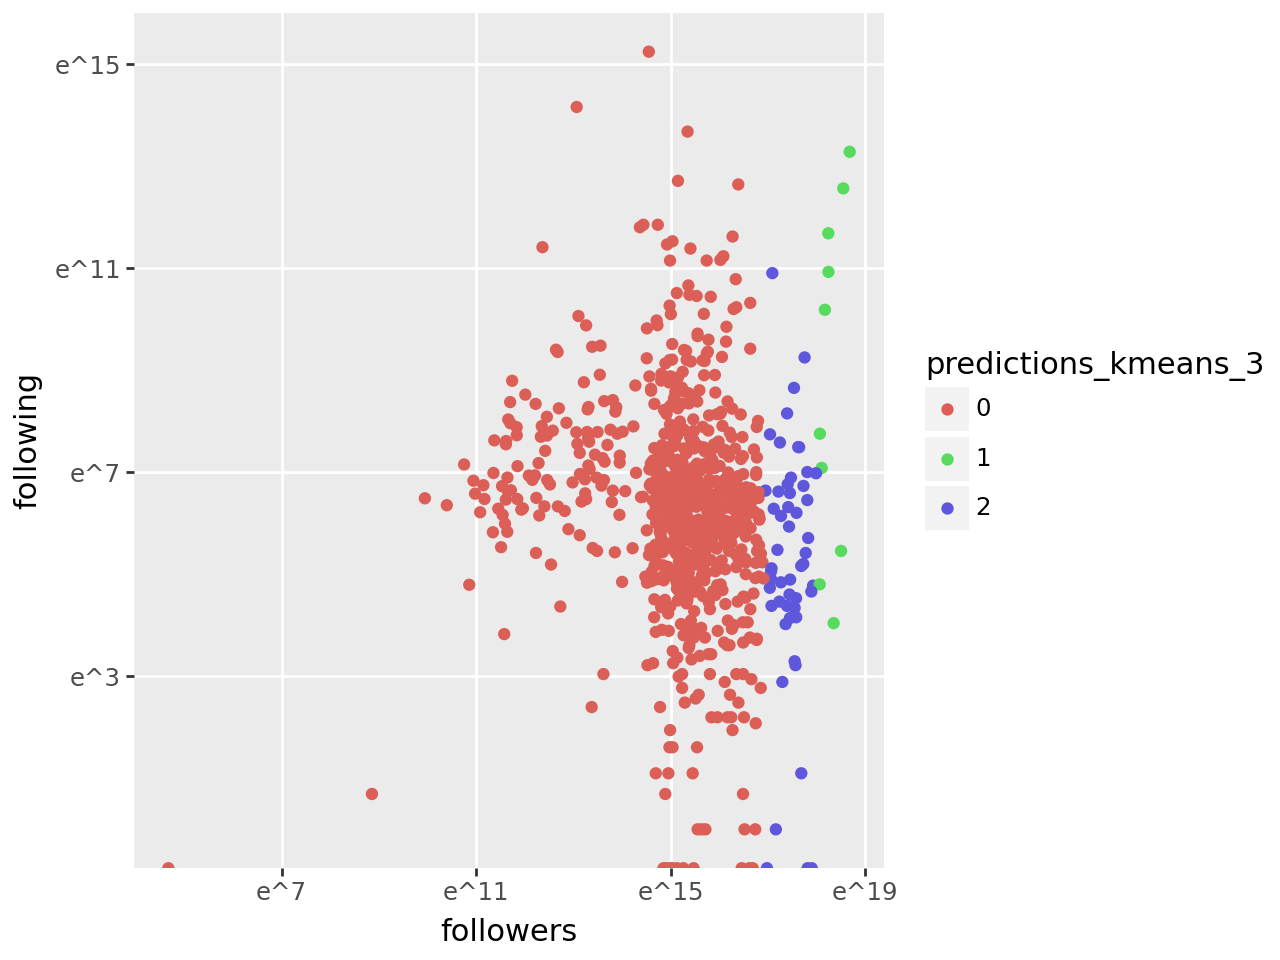

In [595]:
#estamos usando plotnine que es una implementacion de ggplot en python
#creamos un grafico cogiendo las variables de followers y following
#pondremos un color en funcion del cluster predicho
#ponemos una escala logaritmica porque estamos trabajando con numeros muy grandes

graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='following', color='predictions_kmeans_3'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph

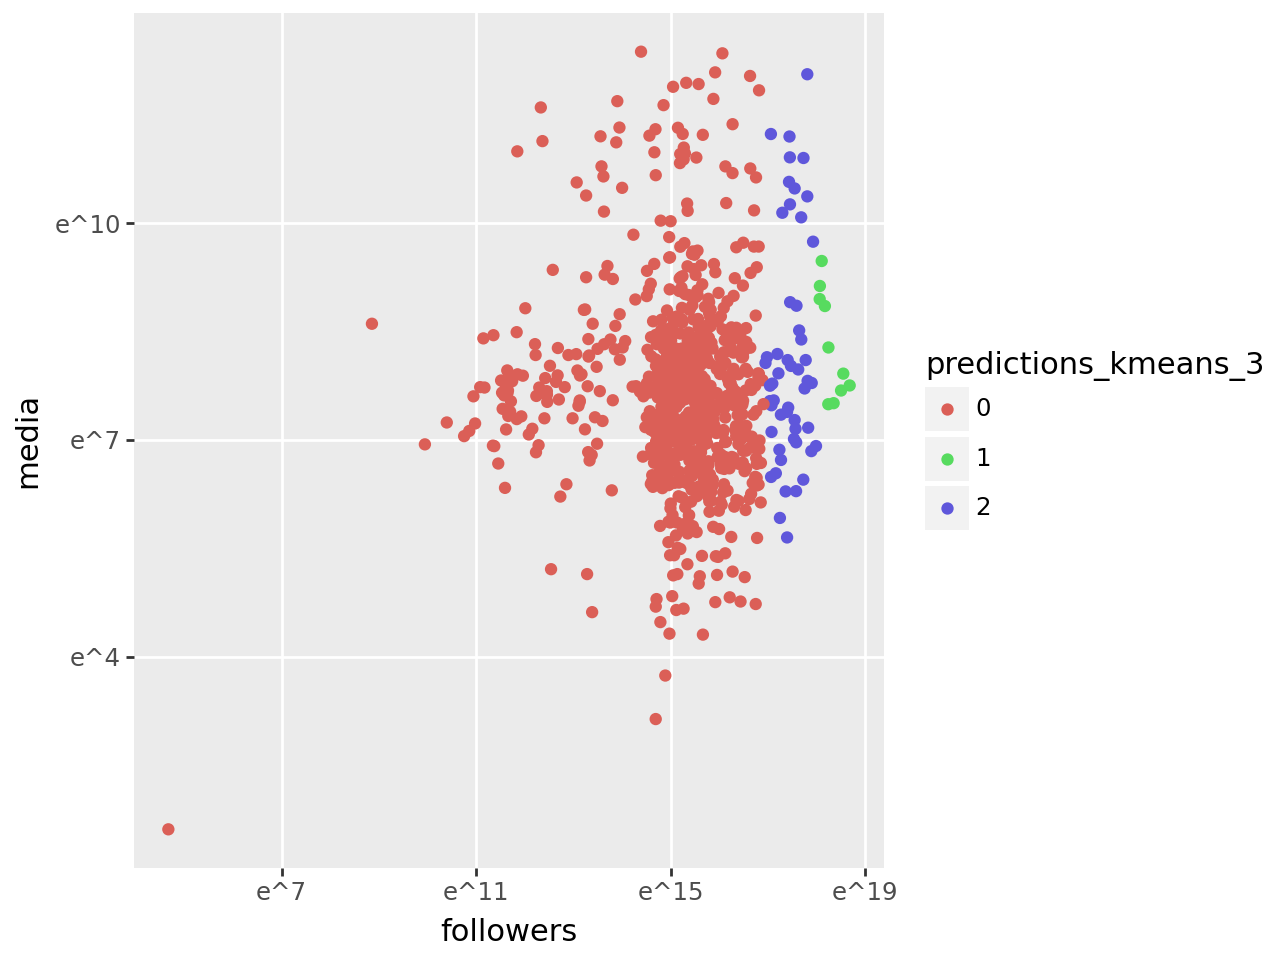

In [596]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='media', color='predictions_kmeans_3'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph



C:\Users\nuria\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log


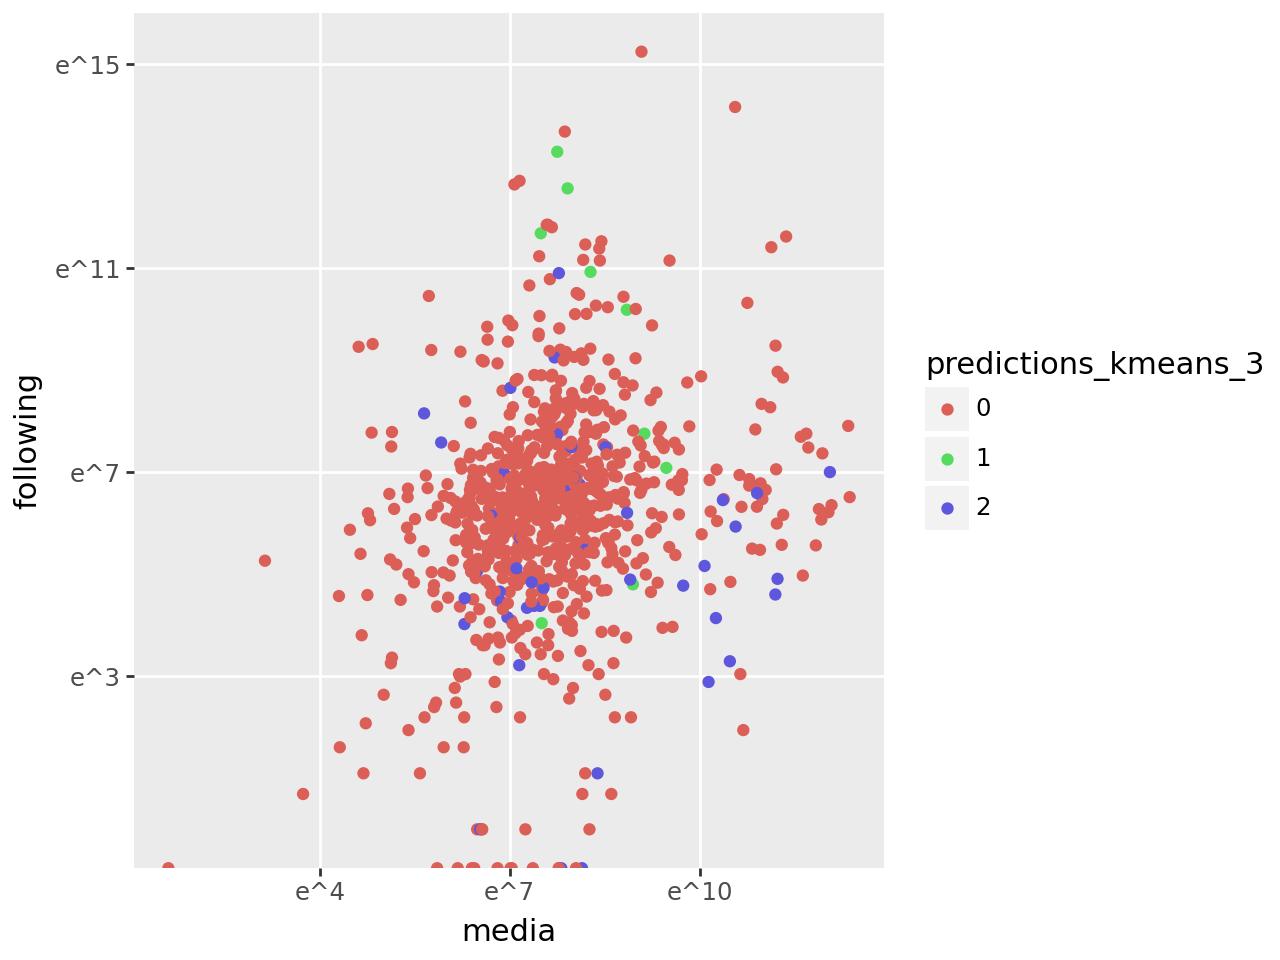

In [597]:
graph = (
    pn.ggplot(user_stats, pn.aes(x='media', y='following', color='predictions_kmeans_3'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph

In [598]:
user_stats['predictions_kmeans_10'] = user_stats.predictions_kmeans_10.astype(str)

C:\Users\nuria\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log


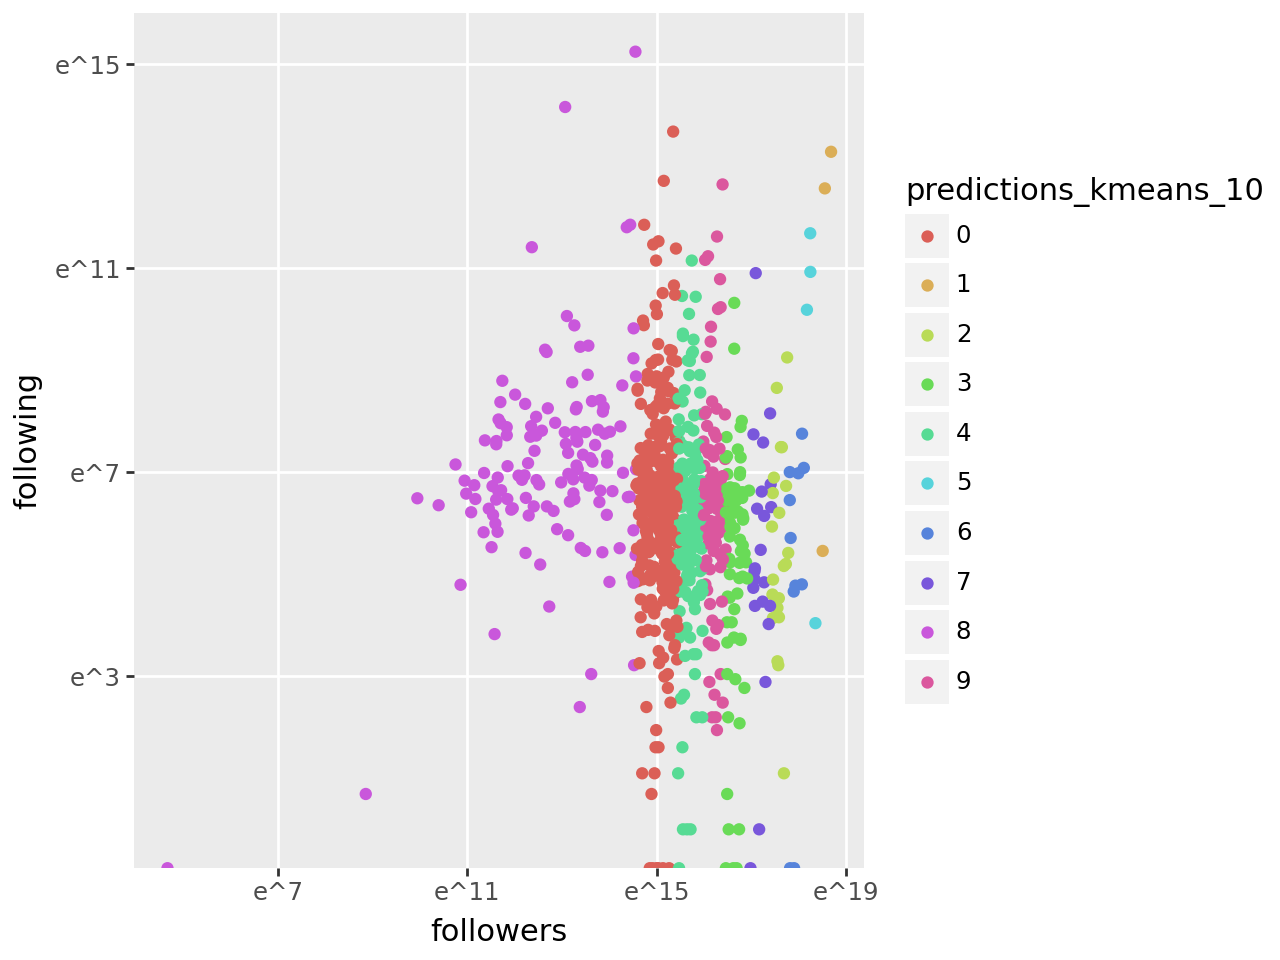

In [599]:
#vemos que con 10 cluster la grafica es bastante similar
graph = (
    pn.ggplot(user_stats, pn.aes(x='followers', y='following', color='predictions_kmeans_10'))
    + pn.geom_point()
    + pn.scale_x_continuous(trans='log')
    + pn.scale_y_continuous(trans='log')
)

graph

## Evaluacion de resultados

In [601]:
from sklearn import metrics

In [602]:
#la inertia  es la media de distancia de los puntos a su centro(cluster). Cuanto mas pequeño mejor
#es una metrica dificil de interpretar orque depende de las mismas variables que se utilizaron en el modelo
model_3.inertia_

2.7886461622347704e+16

In [603]:
#Silhouette score mide la diferencia entre la distancia a otros clusters comparado con el cluster del punto. 
#Cuando mas cerca a 1, mejor
#Silohouette con 3 clusters
#cogemos las variables que teniamos y lo que hemos predicho
metrics.silhouette_score(user_stats[X_variables], user_stats.predictions_kmeans_3)

0.813655399483522

In [604]:
#silohouette con 10 clusters
#nos esta revelando que de forma matematica es mejor el resultado que nos ha dado el de 3 clusters
metrics.silhouette_score(user_stats[X_variables], user_stats.predictions_kmeans_10)

0.556595839098367

In [605]:
#caliniski Harbas es similar a Silohouette y calcula el ratio de "dispersion" dentro del cluster con la dispersion fuera del cluster 
#donde la dispersion es la suma de distancias cuadradas.
# debe ser normalizado entre ejemplos, a diferencia del Silhouette score tiene un rango mayor.
#cuanto mas bajo el resultado mejor
metrics.calinski_harabasz_score(user_stats[X_variables], user_stats.predictions_kmeans_3)


1863.9798349609982

In [606]:
metrics.calinski_harabasz_score(user_stats[X_variables], user_stats.predictions_kmeans_10)

5037.155550427536

In [607]:
#Davies Bouldin calcula el ratio de la distancia entre clusters a la dispersion de estos clusters.
#Preferimos tener clusters muy alejados y poco dispersos. El score minimo es 0.

In [608]:
metrics.davies_bouldin_score(user_stats[X_variables], user_stats.predictions_kmeans_3)

0.4686136649881502

In [609]:
metrics.davies_bouldin_score(user_stats[X_variables], user_stats.predictions_kmeans_10)

0.49881812585689583

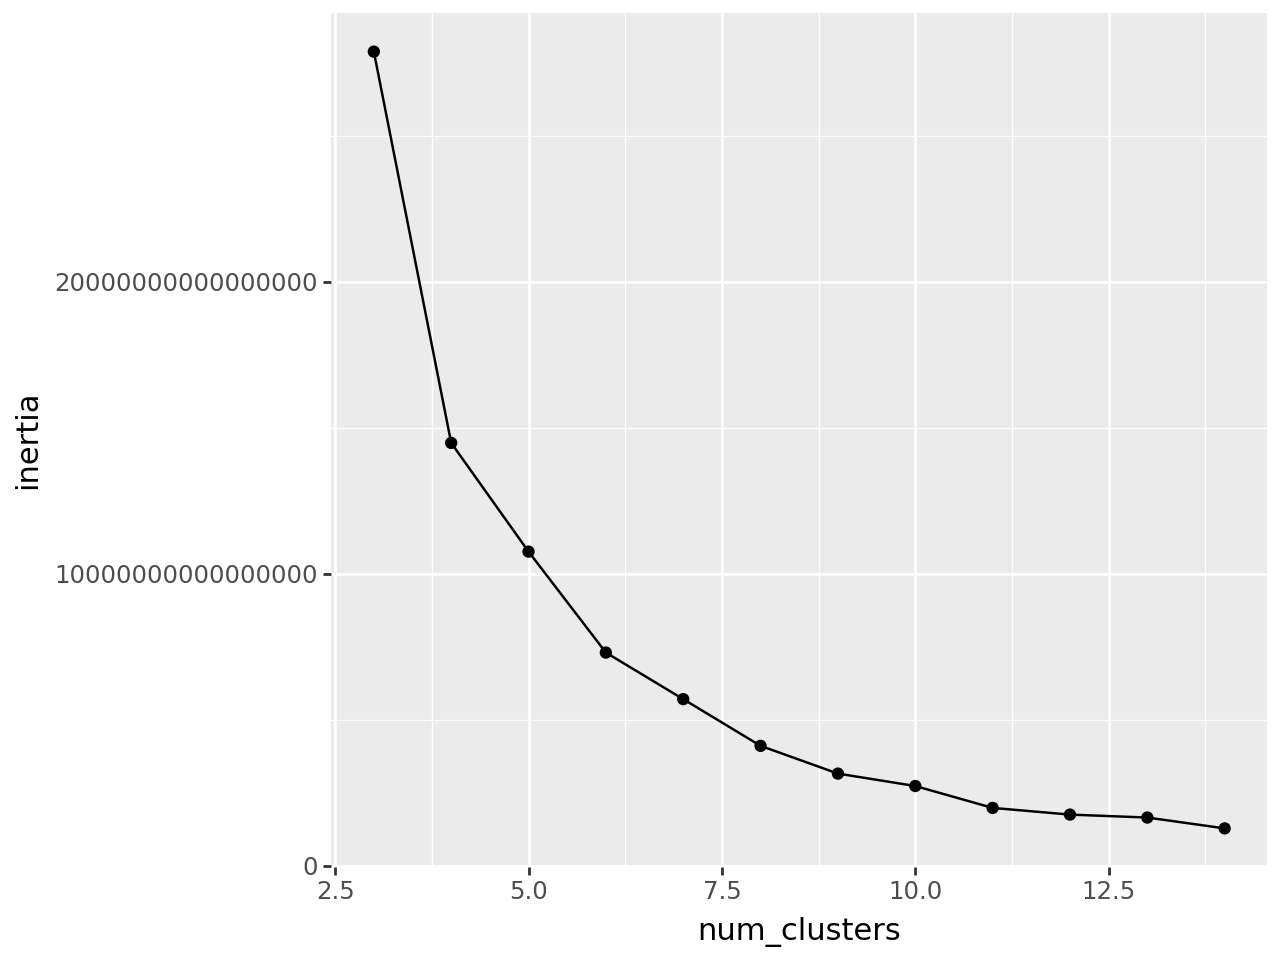

In [610]:
#ara determinar el número optimo de clusters, es muy comun utilizar el metodo del codo
#Al ver la grafica podemos ver que a mas clusteres mejor, la inercia que va bajando
#cuando la reduccion es muy pequeña dolemos decir que ese es el mejor numero de clusters
#favorecemos un num de clusters menor porque los resultados con muchos clusters son dificiles de interpretar
#el mejor numero de clsuteres aqui seria 5 o 6
results = []
for n_clusters in range(3, 15):
    model = KMeans(n_clusters=n_clusters, random_state=0)
    model.fit(user_stats[X_variables])
    results.append({'num_clusters' : n_clusters, 'inertia' : model.inertia_})
    
results = pd.DataFrame(results)

graph = pn.ggplot(results, pn.aes(x='num_clusters', y='inertia')) + pn.geom_point() + pn.geom_line()
graph